# Import required libraries

In [1]:
import tensorflow as tf

# Loading mnist dataset

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 5s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

# Example image in the dataset

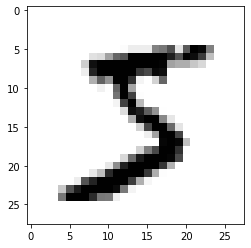

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')

In [6]:
y_train[0]

5

In [7]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## One hot coding

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

y_train_encoded.shape

(60000, 10)

## Preprocessing

In [9]:
import numpy as np

In [10]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

x_train_reshaped.shape

(60000, 784)

## normalization

In [13]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped -x_mean) / (x_std + epsilon)

## Creating model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

## Compiling model

In [16]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Training model

In [17]:
model.fit(x_train_norm, y_train_encoded, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3655 - accuracy: 0.8951
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1786 - accuracy: 0.9485
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1363 - accuracy: 0.9610


In [18]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print(accuracy *100)

313/313 [==============================] - 1s 3ms/step - loss: 0.1275 - accuracy: 0.9606
96.06000185012817


## prediction

In [20]:
preds = model.predict(x_test_norm)

preds.shape

(10000, 10)

## ploting the result

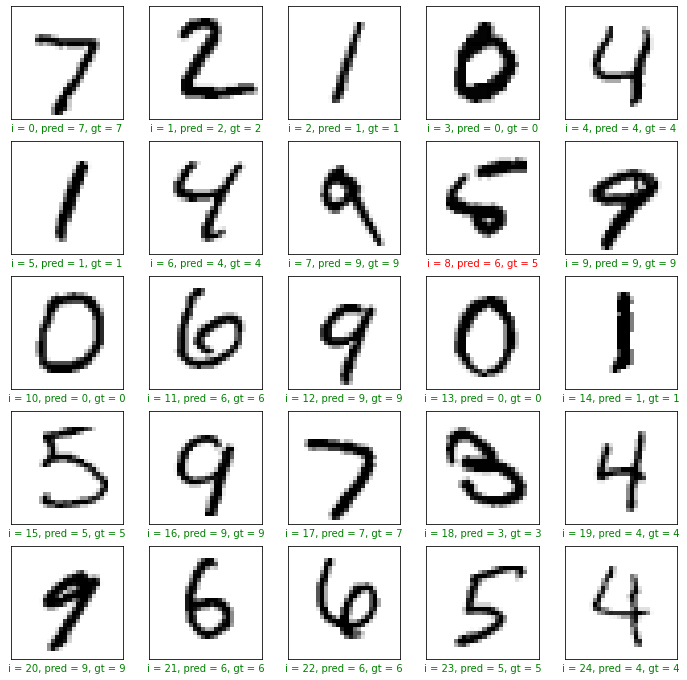

In [22]:
plt.figure(figsize = (12, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[i])
    gt = y_test[i]
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i = {}, pred = {}, gt = {}'.format(i, pred, gt), color = col)
    plt.imshow(x_test[i], cmap = 'binary')

plt.show()